## Assignment 25.1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga
### RANDOM FOREST

In [96]:
# In this assignment students will build the random forest model after normalizing the
# variable to house pricing from boston data set.

#### Loading libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [98]:
from sklearn import datasets
boston = datasets.load_boston()

#### Features and Target variable

In [99]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [100]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [102]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [103]:
targets.shape

(506,)

#### No NULL values and all are numeric data; we don't need to factorize any data

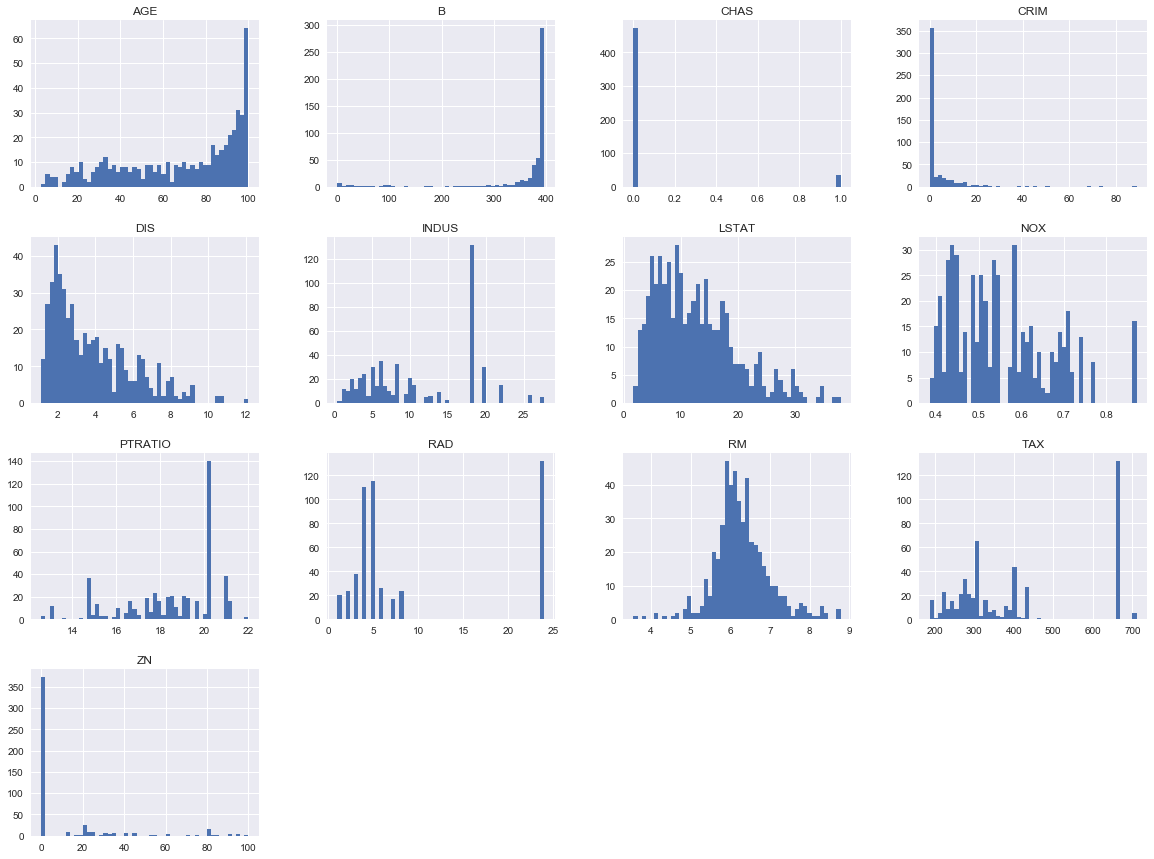

In [104]:
features.hist(bins=50, figsize=(20,15))
plt.show()

#### Above charts show that each variable is measured differently... needs normalization

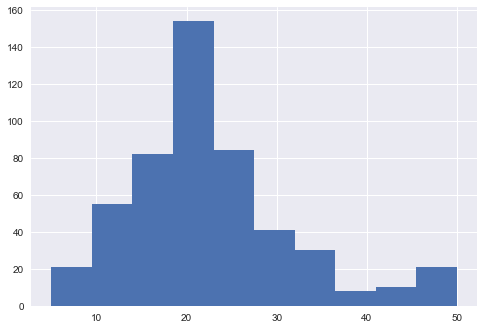

In [105]:
plt.hist(targets)
plt.show()

#### Target variable is continuous, so we will need REGRESSOR

In [106]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

bag_regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=3)

rf_regr = RandomForestRegressor(random_state=3)

print (bag_regr)
print (rf_regr)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=3, verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=3,
           verbose=0, warm_start=False)


In [107]:
X = features
y = targets

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [109]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94
338,0.03306,0.0,5.19,0.0,0.515,6.059,37.3,4.8122,5.0,224.0,20.2,396.14,8.51
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29


#### Normalizing the data before running the model

In [110]:
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train_scaled = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Visualize the Normalized Data
print(X_train_scaled.head())
print(X_test_scaled.head())


         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
55  -0.461606  3.049960 -1.476954 -0.259281 -1.318061  1.337346 -1.638468   
457  0.659040 -0.518212  1.001721 -0.259281  1.385524 -0.496702  0.385413   
338 -0.458875 -0.518212 -0.893995 -0.259281 -0.341282 -0.324891 -1.104774   
56  -0.460587  2.851728 -1.547437 -0.259281 -1.257013  0.127684 -1.160222   
364  0.012136 -0.518212  1.001721  3.856812  1.429130  3.475904  0.475517   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
55   2.394845 -0.517664 -1.119033 -0.303896  0.447535 -1.117486  
457 -0.485218  1.666117  1.570613  0.756653 -4.165919  0.654113  
338  0.504265 -0.517664 -1.131259  0.756653  0.450004 -0.577097  
56   2.633820 -0.862471 -0.587217 -0.580561  0.458939 -0.977277  
364 -0.910847  1.666117  1.570613  0.756653 -0.038933 -1.047382  
         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
224 -0.420240 -0.518212 -0.745686 -0.259281 -0.437216  2.757930 

In [111]:
bag_regr.fit(X_train_scaled, y_train)
rf_regr.fit(X_train_scaled, y_train)


print ("Bagging: Accuracy in Train = ", bag_regr.score(X_train_scaled, y_train))
print ("Bagging: Accuracy in Test  = ", bag_regr.score(X_test_scaled, y_test))

print ("RandomForest: Accuracy in Train = ", rf_regr.score(X_train_scaled, y_train))
print ("RandomForest: Accuracy in Test  = ", rf_regr.score(X_test_scaled, y_test))

Bagging: Accuracy in Train =  0.97408002318
Bagging: Accuracy in Test  =  0.857445856555
RandomForest: Accuracy in Train =  0.974341504619
RandomForest: Accuracy in Test  =  0.856335305071


#### Random Forest model built is 85% accurate in predicting the Boston house prices